In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
root_path = '/content/drive/MyDrive/Projects/StartupValuation/'

Mounted at /content/drive


## Data Preparation

In [4]:
startup_df = pd.read_csv(root_path + 'dataset.csv')

### Data Inspection and Cleaning

In [6]:
# Check the first few rows
startup_df.head()

# Get information about the data
startup_df.info()

# Describe the data
startup_df.describe()

# Check for missing values
startup_df.isnull().sum()

# Convert dates and handle missing values
startup_df['founded_at'] = pd.to_datetime(startup_df['founded_at'], errors='coerce')
startup_df.fillna(0, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196498 entries, 0 to 196497
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           196498 non-null  object 
 1   category_code                123132 non-null  object 
 2   status                       196498 non-null  object 
 3   founded_at                   91181 non-null   object 
 4   logo_width                   196498 non-null  int64  
 5   logo_height                  196498 non-null  int64  
 6   country_code                 87935 non-null   object 
 7   investment_rounds            196498 non-null  int64  
 8   invested_companies           196498 non-null  int64  
 9   funding_rounds               196498 non-null  int64  
 10  funding_total_usd            196498 non-null  float64
 11  milestones                   196498 non-null  int64  
 12  relationships                196498 non-null  int64  
 13 

## Data Exploration and Analysis

### Data Description

In [14]:
print(startup_df['status'].value_counts())
print(startup_df.groupby('country_code').size())

status
operating    183387
acquired       9393
closed         2584
ipo            1134
Name: count, dtype: int64
country_code
0      108563
AFG         8
AGO         2
AIA         1
ALB        10
        ...  
VNM        67
YEM         2
ZAF       277
ZMB         2
ZWE         4
Length: 174, dtype: int64


### Data Visualization

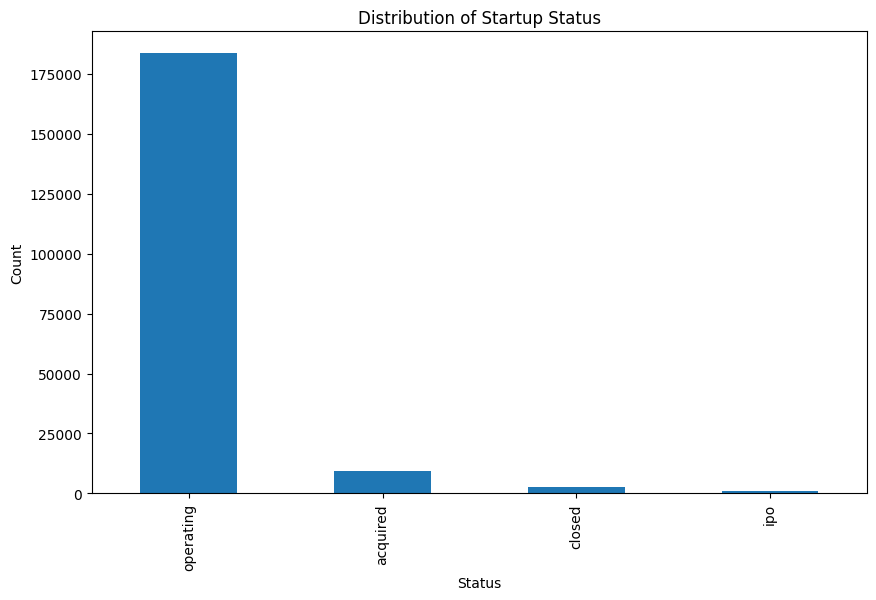

In [9]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
startup_df['status'].value_counts().plot(kind='bar')
plt.title('Distribution of Startup Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

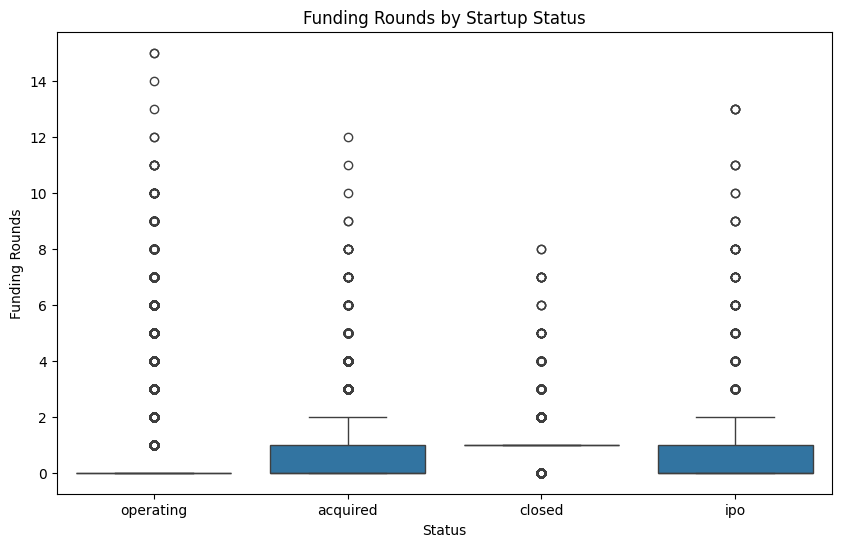

In [10]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='funding_rounds', data=startup_df)
plt.title('Funding Rounds by Startup Status')
plt.xlabel('Status')
plt.ylabel('Funding Rounds')
plt.show()

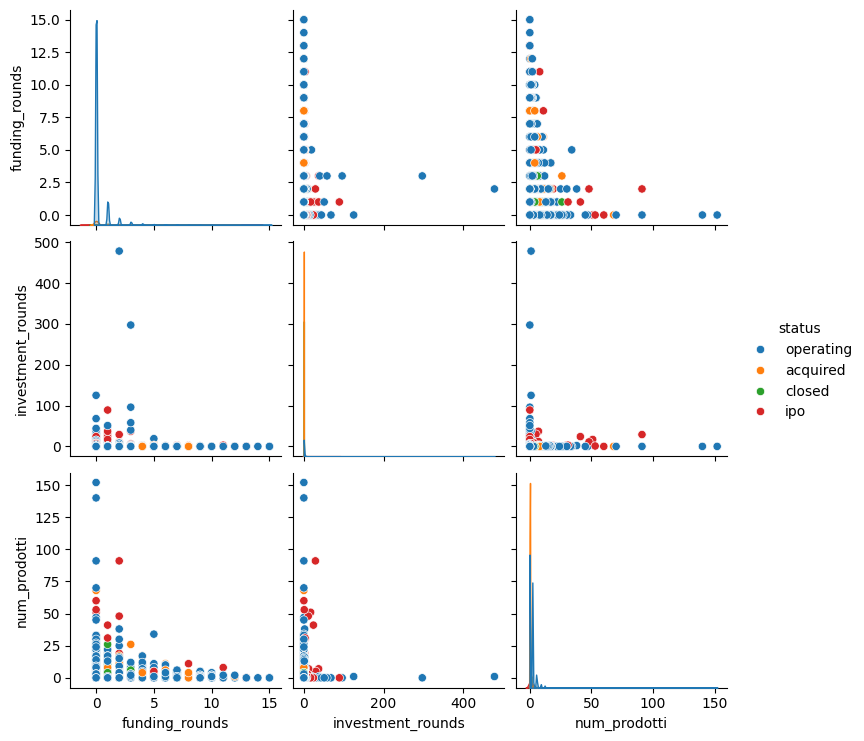

In [11]:
# Multivariate Analysis
sns.pairplot(startup_df[['funding_rounds', 'investment_rounds', 'num_prodotti', 'status']], hue='status')
plt.show()

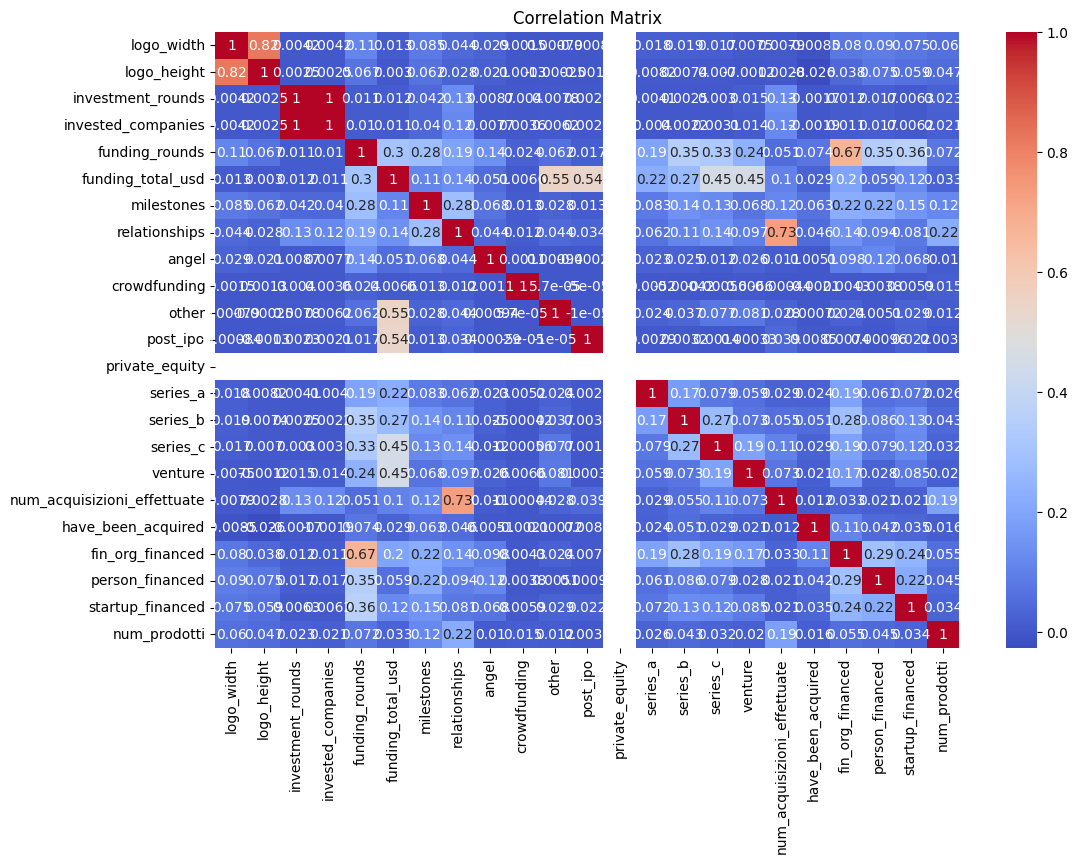

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = startup_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()